In [1]:
# Import library
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load dataset
data = pd.read_csv('../Data/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Split data menjadi features (X) dan target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [4]:
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [5]:
# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [6]:
# Model KNN (k=5)
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_time = time.time() - start_time

print("KNN (k=5):")
print(f"Waktu eksekusi: {knn_time:.4f} detik")
print(classification_report(y_test, y_pred_knn))

KNN (k=5):
Waktu eksekusi: 0.0100 detik
              precision    recall  f1-score   support

           0       0.73      0.82      0.78       101
           1       0.56      0.43      0.49        53

    accuracy                           0.69       154
   macro avg       0.65      0.63      0.63       154
weighted avg       0.67      0.69      0.68       154



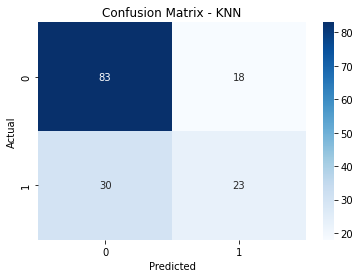

In [7]:
# Confusion matrix untuk KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn, "Confusion Matrix - KNN")

In [8]:
# Model ANN (Multilayer Perceptron)
start_time = time.time()
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=50)
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)
ann_time = time.time() - start_time

print("ANN (MLP):")
print(f"Waktu eksekusi: {ann_time:.4f} detik")
print(classification_report(y_test, y_pred_ann))

ANN (MLP):
Waktu eksekusi: 0.2570 detik
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       101
           1       0.56      0.51      0.53        53

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



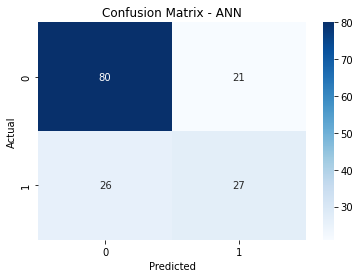

In [9]:
# Confusion matrix untuk ANN
cm_ann = confusion_matrix(y_test, y_pred_ann)
plot_confusion_matrix(cm_ann, "Confusion Matrix - ANN")

In [10]:
# Model Decision Tree
start_time = time.time()
decision_tree = DecisionTreeClassifier(random_state=50)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
tree_time = time.time() - start_time

print("Decision Tree:")
print(f"Waktu eksekusi: {tree_time:.4f} detik")
print(classification_report(y_test, y_pred_tree))

Decision Tree:
Waktu eksekusi: 0.0090 detik
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       101
           1       0.57      0.51      0.54        53

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



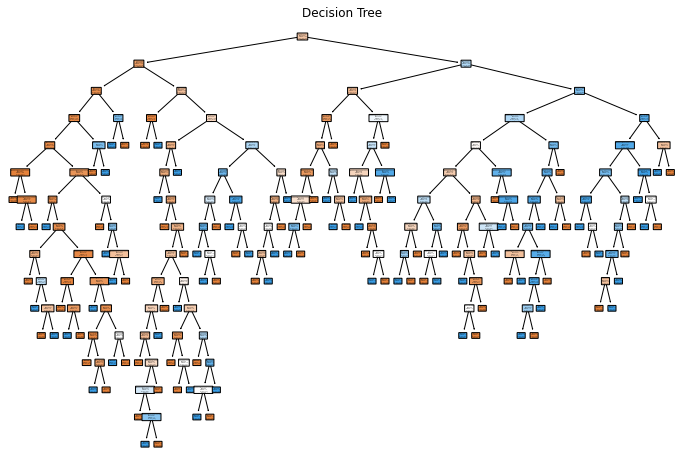

In [11]:
# Visualisasi Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.title("Decision Tree")
plt.show()